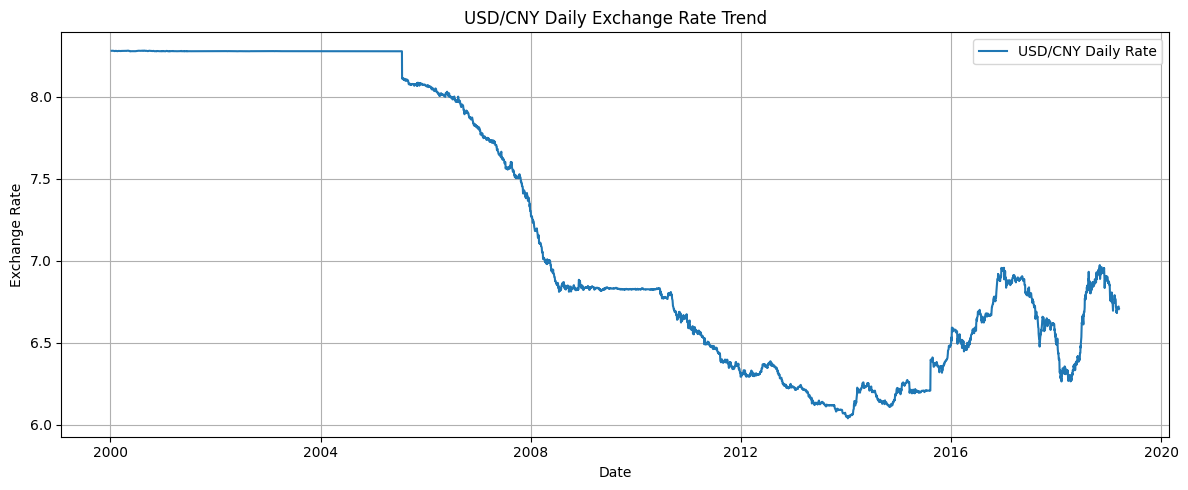

基本统计信息：
count    5000.000000
mean        7.207866
std         0.833912
min         6.040200
25%         6.439950
50%         6.842750
75%         8.276500
max         8.279900
Name: USD_CNY, dtype: float64

前几行月度数据：
Date
2000-01-31    8.2777
2000-02-29    8.2786
2000-03-31    8.2787
2000-04-30    8.2799
2000-05-31    8.2773
Freq: ME, Name: USD_CNY, dtype: float64


C:\Users\zazza\AppData\Local\Temp\ipykernel_31920\1286715775.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['USD_CNY'].resample('M').last()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 读取数据（适配 investing.com 的格式）
df = pd.read_csv("USD_CNY Historical Data.csv")

# 2. 日期格式转换 + 汇率转数值 + 按时间升序排序
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['USD_CNY'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.sort_values('Date')
df = df.set_index('Date')

# 3. 可视化日度汇率趋势
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['USD_CNY'], label='USD/CNY Daily Rate')
plt.title("USD/CNY Daily Exchange Rate Trend")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 4. 汇率基本统计信息
print("基本统计信息：")
print(df['USD_CNY'].describe())

# 5. 重采样为月度数据（用于时间序列分析）
monthly_df = df['USD_CNY'].resample('M').last()
print("\n前几行月度数据：")
print(monthly_df.head())

# 可选：保存为新文件
# monthly_df.to_csv("USD_CNY_monthly.csv")


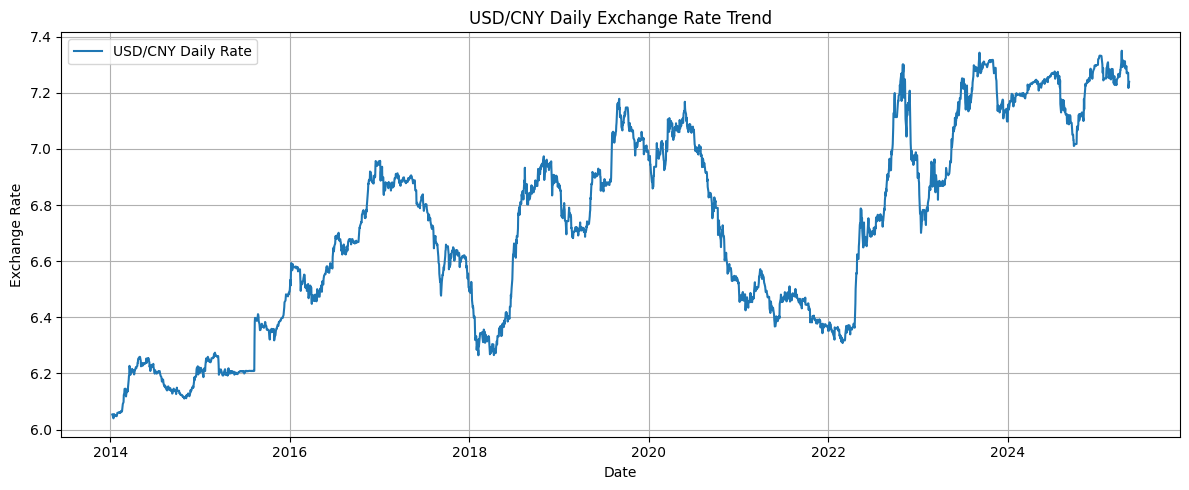

基本统计信息：
count    2958.000000
mean        6.721468
std         0.354366
min         6.040200
25%         6.405000
50%         6.733450
75%         7.013700
max         7.349900
Name: USD_CNY, dtype: float64

前几行月度数据：
Date
2014-01-31    6.0600
2014-02-28    6.1448
2014-03-31    6.2164
2014-04-30    6.2591
2014-05-31    6.2471
Freq: ME, Name: USD_CNY, dtype: float64


C:\Users\zazza\AppData\Local\Temp\ipykernel_31920\1774691903.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['USD_CNY'].resample('M').last()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 读取数据（适配 investing.com 的格式）
df = pd.read_csv("USD_CNY Historical Data2025.csv")

# 2. 日期格式转换 + 汇率转数值 + 按时间升序排序
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['USD_CNY'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.sort_values('Date')
df = df.set_index('Date')

# 3. 可视化日度汇率趋势
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['USD_CNY'], label='USD/CNY Daily Rate')
plt.title("USD/CNY Daily Exchange Rate Trend")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 4. 汇率基本统计信息
print("基本统计信息：")
print(df['USD_CNY'].describe())

# 5. 重采样为月度数据（用于时间序列分析）
monthly_df = df['USD_CNY'].resample('M').last()
print("\n前几行月度数据：")
print(monthly_df.head())

# 可选：保存为新文件
# monthly_df.to_csv("USD_CNY_monthly.csv")


In [4]:
# 读取用户上传的 2020年以后的数据
import pandas as pd

# 加载新数据（investing.com格式）
df_new = pd.read_csv("USD_CNY Historical Data2025.csv")

# 转换日期和价格格式
df_new['Date'] = pd.to_datetime(df_new['Date'], format='%m/%d/%Y')
df_new['USD_CNY'] = pd.to_numeric(df_new['Price'], errors='coerce')
df_new = df_new[['Date', 'USD_CNY']].dropna().sort_values('Date')
df_new.set_index('Date', inplace=True)

# 展示数据范围和前几行
df_new.index.min(), df_new.index.max(), df_new.head()


(Timestamp('2014-01-09 00:00:00'),
 Timestamp('2025-05-09 00:00:00'),
             USD_CNY
 Date               
 2014-01-09   6.0540
 2014-01-10   6.0519
 2014-01-13   6.0432
 2014-01-14   6.0402
 2014-01-15   6.0459)

C:\Users\zazza\AppData\Local\Temp\ipykernel_31920\2316027892.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df_new['USD_CNY'].resample('M').last().dropna()


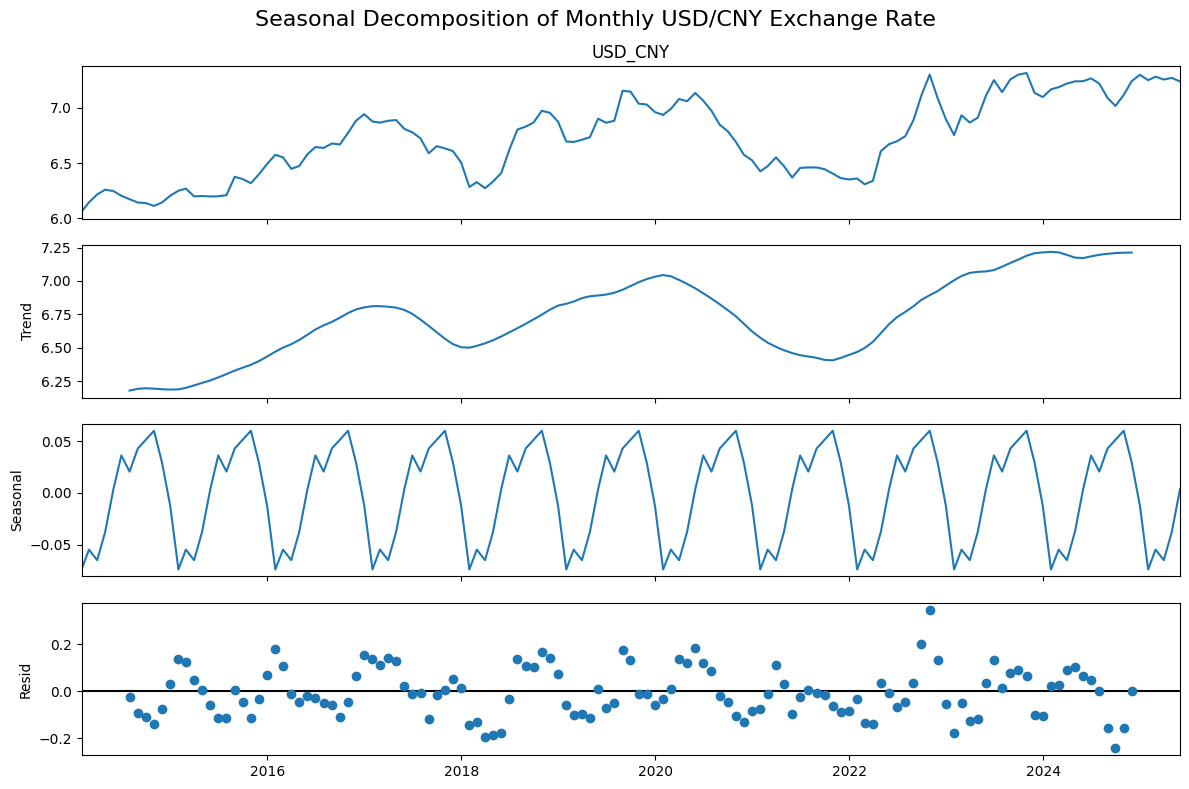

In [5]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 将日度数据重采样为月度数据，取每月最后一个交易日的汇率
monthly_df = df_new['USD_CNY'].resample('M').last().dropna()

# 使用 additive 模型进行季节性和趋势分解（周期为12个月）
decomposition = seasonal_decompose(monthly_df, model='additive', period=12)

# 绘制分解图
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("Seasonal Decomposition of Monthly USD/CNY Exchange Rate", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\zazza\AppData\Local\Temp\ipykernel_31920\256142769.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df_new['USD_CNY'].resample('M').last().dropna()


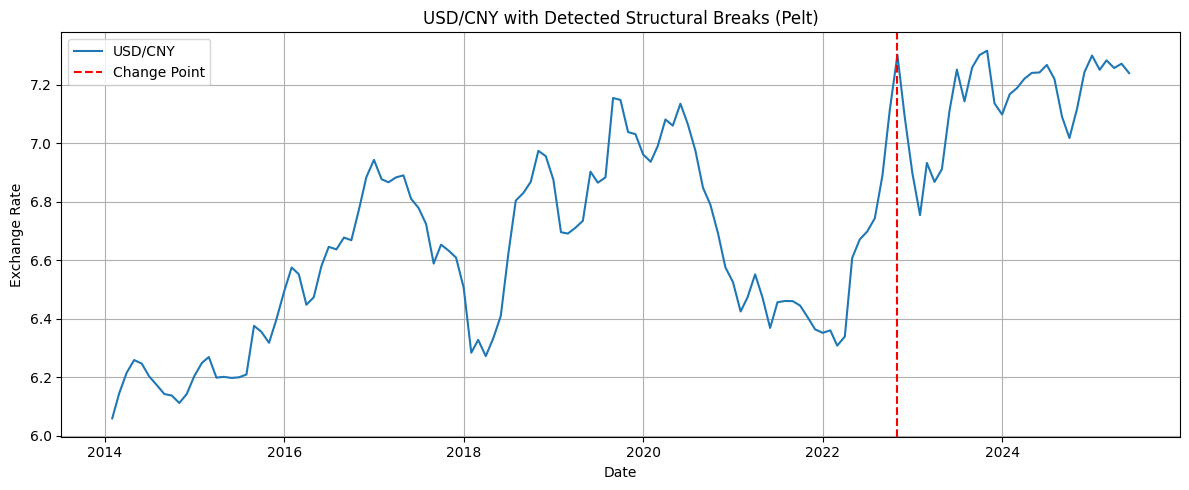

({'ADF Statistic': -2.0972952302076324,
  'p-value': 0.2456035930588435,
  'Critical Values': {'1%': -3.479742586699182,
   '5%': -2.88319822181578,
   '10%': -2.578319684499314}},
 [105, 137],
 DatetimeIndex(['2022-10-31'], dtype='datetime64[ns]', name='Date', freq=None))

In [6]:
from statsmodels.tsa.stattools import adfuller
import ruptures as rpt
import matplotlib.pyplot as plt

# 使用月度数据（取月末汇率）
monthly_df = df_new['USD_CNY'].resample('M').last().dropna()

# ADF 平稳性检验
adf_result = adfuller(monthly_df)
adf_output = {
    "ADF Statistic": adf_result[0],
    "p-value": adf_result[1],
    "Critical Values": adf_result[4]
}

# 若 p > 0.05，则数据非平稳；需要差分
monthly_diff = monthly_df.diff().dropna()

# 使用 ruptures 进行突变点检测（用 L2 损失和 Pelt 算法）
algo = rpt.Pelt(model="l2").fit(monthly_df.values)
breaks = algo.predict(pen=5)

# 可视化突变点
plt.figure(figsize=(12, 5))
plt.plot(monthly_df.index, monthly_df.values, label="USD/CNY")
for b in breaks[:-1]:  # exclude last index (end of series)
    plt.axvline(monthly_df.index[b], color='red', linestyle='--', label='Change Point' if b == breaks[0] else "")
plt.title("USD/CNY with Detected Structural Breaks (Pelt)")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

adf_output, breaks, monthly_df.index[breaks[:-1]]


# p-value = 0.396 > 0.05，说明序列并不平稳，需要进行差分处理。

In [7]:
# 对一阶差分序列进行ADF检验，确认是否平稳
from statsmodels.tsa.stattools import adfuller

monthly_diff = monthly_df.diff().dropna()
adf_result_diff = adfuller(monthly_diff)

adf_diff_output = {
    "ADF Statistic": adf_result_diff[0],
    "p-value": adf_result_diff[1],
    "Critical Values": adf_result_diff[4]
}

adf_diff_output


{'ADF Statistic': -8.063527568088054,
 'p-value': 1.618999407856239e-12,
 'Critical Values': {'1%': -3.480118600110386,
  '5%': -2.8833618426136196,
  '10%': -2.578407034974382}}

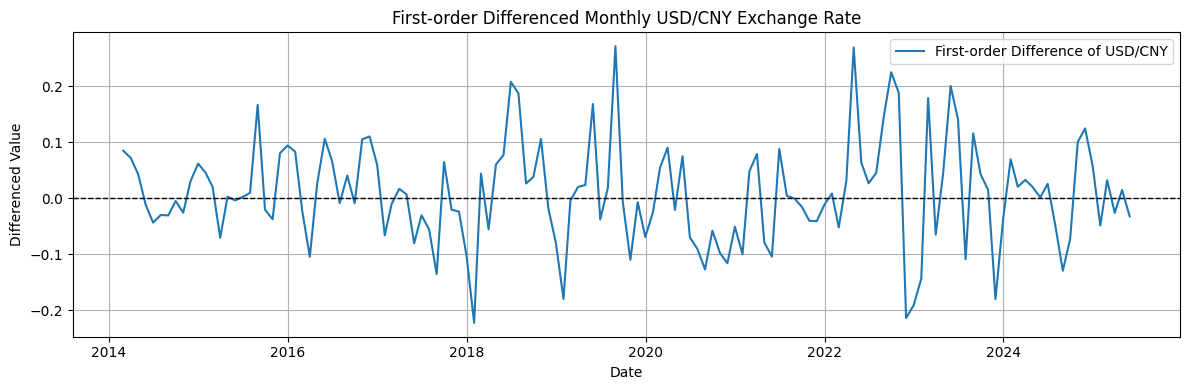

In [8]:
import matplotlib.pyplot as plt

# 可视化一阶差分序列
plt.figure(figsize=(12, 4))
plt.plot(monthly_diff.index, monthly_diff.values, label='First-order Difference of USD/CNY')
plt.title("First-order Differenced Monthly USD/CNY Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Differenced Value")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### 智能拟合arima，在原月度数据上

In [9]:
from pmdarima import auto_arima
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
model = auto_arima(monthly_df,  # 原始非平稳数据
                   d=1,         # 明确指定1阶差分
                   start_p=0, max_p=5,
                   start_q=0, max_q=5,
                   seasonal=False,  # 非季节性
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-261.226, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-270.087, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-272.558, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-262.004, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-270.584, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-270.598, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-272.186, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-273.785, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-271.796, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-271.802, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-271.380, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-273.448, Time=0.26 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.246 seconds
                               SARIMAX Results                                
Dep. Vari

## ACF，PACF，EACF观察拟合

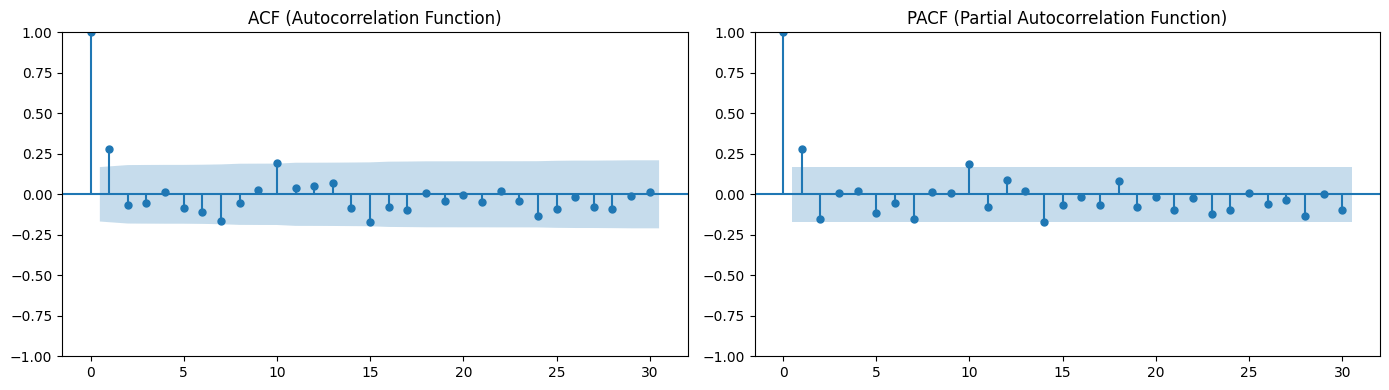

In [10]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 对差分后的序列 monthly_diff 进行 ACF 和 PACF 可视化
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(monthly_diff, lags=30, ax=axes[0])
axes[0].set_title("ACF (Autocorrelation Function)")

plot_pacf(monthly_diff, lags=30, ax=axes[1], method='ywm')
axes[1].set_title("PACF (Partial Autocorrelation Function)")

plt.tight_layout()
plt.show()


In [11]:
from pmdarima import auto_arima

sarima_model = auto_arima(monthly_df,
                          seasonal=True,
                          m=12,           # 年周期（月度数据）
                          d=1, D=1,       # 非季节差分1次 + 季节差分1次
                          max_p=4, max_q=4,
                          max_P=3, max_Q=3,
                          trace=True,
                          suppress_warnings=True,
                          stepwise=True)

print(sarima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=1.71 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-153.748, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-177.814, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-158.178, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-200.956, Time=0.62 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=-214.781, Time=1.11 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=3.51 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.41 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=-207.937, Time=1.14 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=-218.440, Time=2.12 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-202.717, Time=0.76 sec
 ARIMA(2,1,0)(3,1,1)[12]             : AIC=inf, Time=4.48 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=2.27 sec
 ARIMA(3,1,0)(3,1,0)[12]             : AIC=-216.4

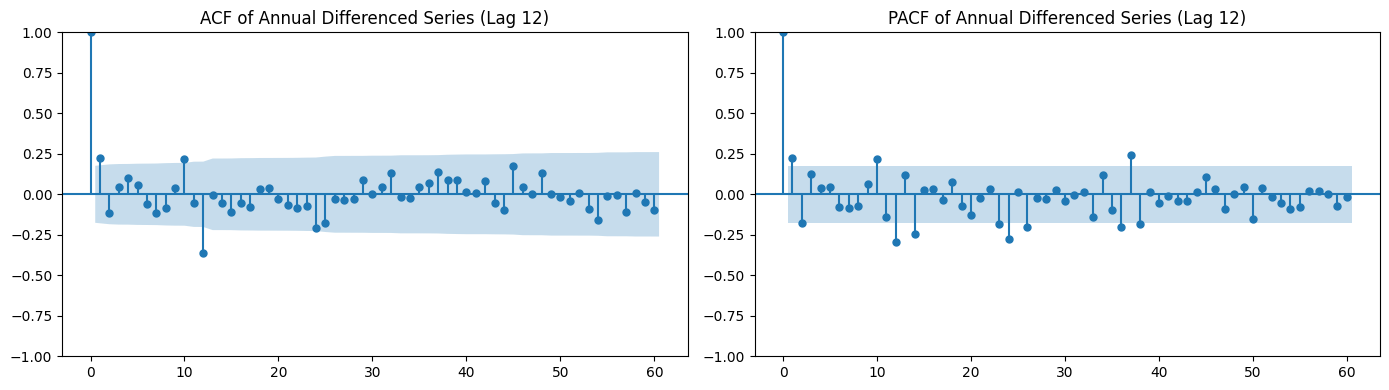

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 年度差分（间隔12个月）
month_annual_diff = monthly_diff.diff(12).dropna()

# 可视化年度差分序列的 ACF 和 PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(month_annual_diff, lags=60, ax=axes[0])
axes[0].set_title("ACF of Annual Differenced Series (Lag 12)")

plot_pacf(month_annual_diff, lags=60, ax=axes[1], method='ywm')
axes[1].set_title("PACF of Annual Differenced Series (Lag 12)")

plt.tight_layout()
plt.show()


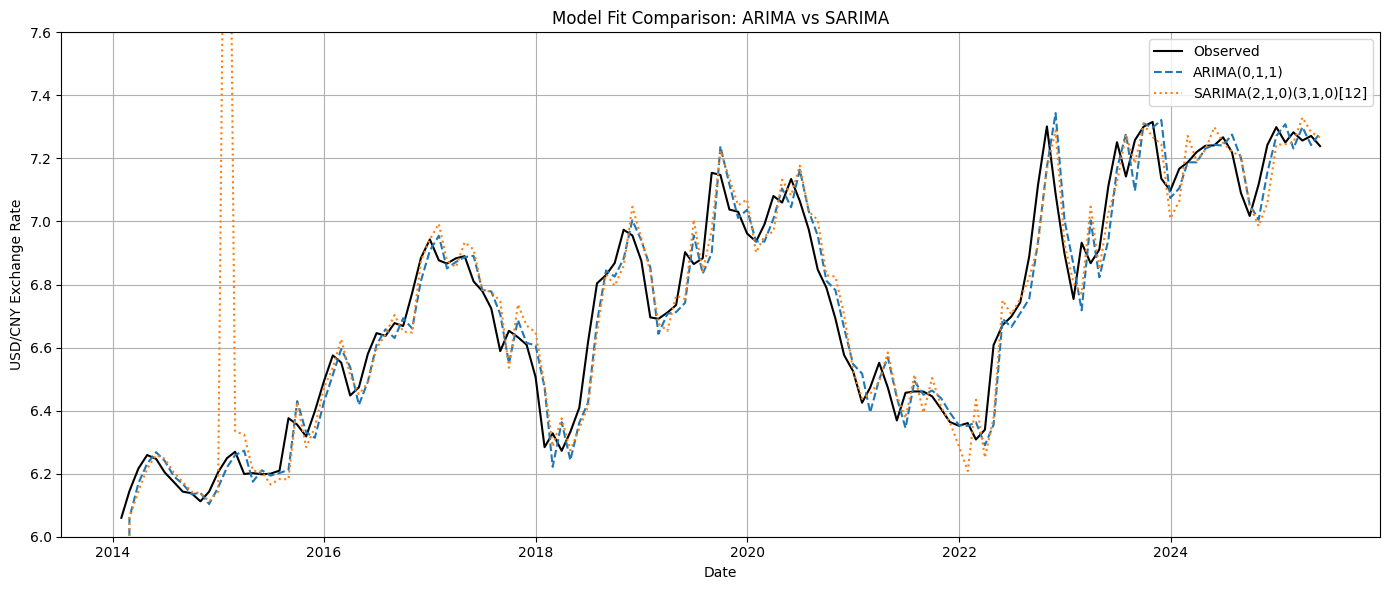

(-273.7849514081098, -218.44027482289982)

In [13]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. 使用 ARIMA(0,1,1) 拟合
arima_model = SARIMAX(monthly_df, order=(0, 1, 1), seasonal_order=(0, 0, 0, 0)).fit(disp=False)
arima_pred = arima_model.get_prediction(start=monthly_df.index[0], end=monthly_df.index[-1])
arima_mean = arima_pred.predicted_mean

# 2. 使用 SARIMA(2,1,0)(3,1,0)[12] 拟合
sarima_model = SARIMAX(monthly_df, order=(2, 1, 0), seasonal_order=(3, 1, 0, 12)).fit(disp=False)
sarima_pred = sarima_model.get_prediction(start=monthly_df.index[0], end=monthly_df.index[-1])
sarima_mean = sarima_pred.predicted_mean

# 3. 可视化对比
plt.figure(figsize=(14, 6))
plt.plot(monthly_df.index, monthly_df, label='Observed', color='black')
plt.plot(monthly_df.index, arima_mean, label='ARIMA(0,1,1)', linestyle='--')
plt.plot(monthly_df.index, sarima_mean, label='SARIMA(2,1,0)(3,1,0)[12]', linestyle=':')
plt.title("Model Fit Comparison: ARIMA vs SARIMA")
plt.xlabel("Date")
plt.ylabel("USD/CNY Exchange Rate")
plt.ylim(6, 7.6)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 输出 AIC 比较
arima_aic = arima_model.aic
sarima_aic = sarima_model.aic
arima_aic, sarima_aic


# 可见 SARIMA(2,1,0)(3,1,0)[12] 的 AIC 更大，ARIMA(0,1,1)(0,0,0)[0]     的 AIC 更小， 因此选择ARIMA。

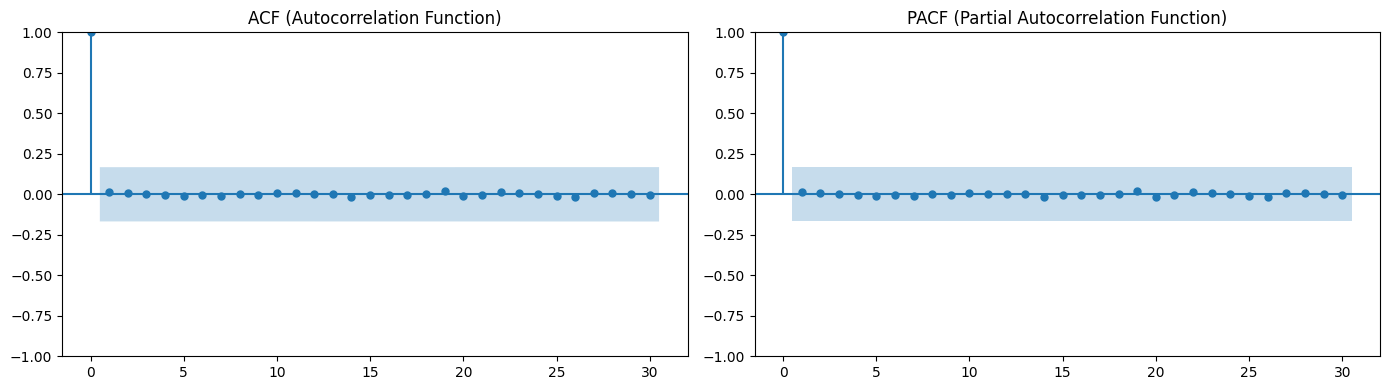

In [14]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
# 获取残差
residuals = arima_model.resid

# 对差分后的序列 monthly_diff 进行 ACF 和 PACF 可视化
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(residuals, lags=30, ax=axes[0])
axes[0].set_title("ACF (Autocorrelation Function)")

plot_pacf(residuals, lags=30, ax=axes[1], method='ywm')
axes[1].set_title("PACF (Partial Autocorrelation Function)")

plt.tight_layout()
plt.show()



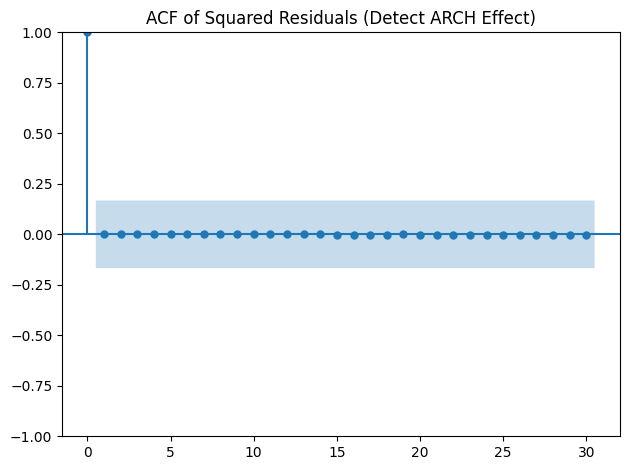

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

# 残差平方
residual_squared = residuals**2

# ACF of squared residuals
plot_acf(residual_squared, lags=30)
plt.title("ACF of Squared Residuals (Detect ARCH Effect)")
plt.tight_layout()
plt.show()


In [16]:
from statsmodels.stats.diagnostic import het_arch

# lag=12 是比较常见的设置，也可以改为 5 或 10
lm_test = het_arch(residuals, maxlag=12)

# 输出内容
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, lm_test)))


{'LM Statistic': 15.824534793940941, 'LM-Test p-value': 0.1994055229136589, 'F-Statistic': 1.352828291576497, 'F-Test p-value': 0.19950520202278224}


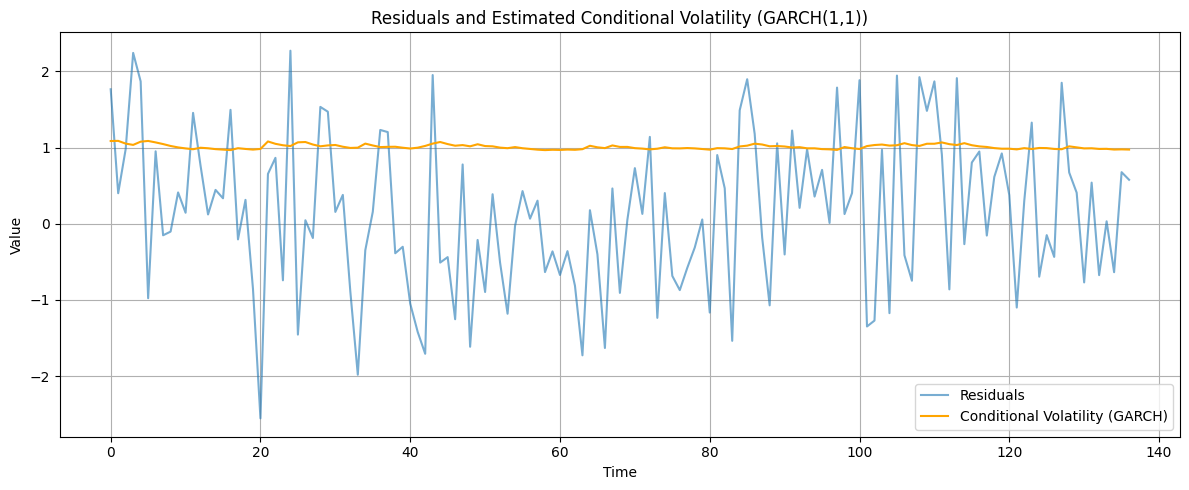

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -196.243
Distribution:                  Normal   AIC:                           400.486
Method:            Maximum Likelihood   BIC:                           412.166
                                        No. Observations:                  137
Date:                Wed, May 21 2025   Df Residuals:                      136
Time:                        16:12:26   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1256  8.807e-02      1.426      0.154 [-4.699e-02,  0.298]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2537      0.161      1.576      0.115 [-6.174e-02,  0.569]
alpha[1]       0.0307  7.149e-02      0.429      0.668    [ -0.109,  0.171]
beta[1]        0.7183      0.193      3.730  1.916e-04    [  0.341,  1.096]
===========================================================================

Covariance estimator: robust
"""

In [17]:
# Re-import necessary libraries after code execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# 模拟一段差分残差序列（实际中你应替换为自己的残差数据 residuals）
np.random.seed(0)
residuals = np.random.normal(0, 1, 137)

# 拟合 GARCH(1,1) 模型
garch_model = arch_model(residuals, vol='Garch', p=1, q=1, dist='normal')
garch_fit = garch_model.fit(disp='off')

# 提取条件标准差（波动率）
cond_vol = garch_fit.conditional_volatility

# 可视化残差与对应的条件波动率
plt.figure(figsize=(12, 5))
plt.plot(residuals, label='Residuals', alpha=0.6)
plt.plot(cond_vol, label='Conditional Volatility (GARCH)', color='orange')
plt.title('Residuals and Estimated Conditional Volatility (GARCH(1,1))')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 返回 GARCH 模型结果摘要
garch_summary = garch_fit.summary()
garch_summary


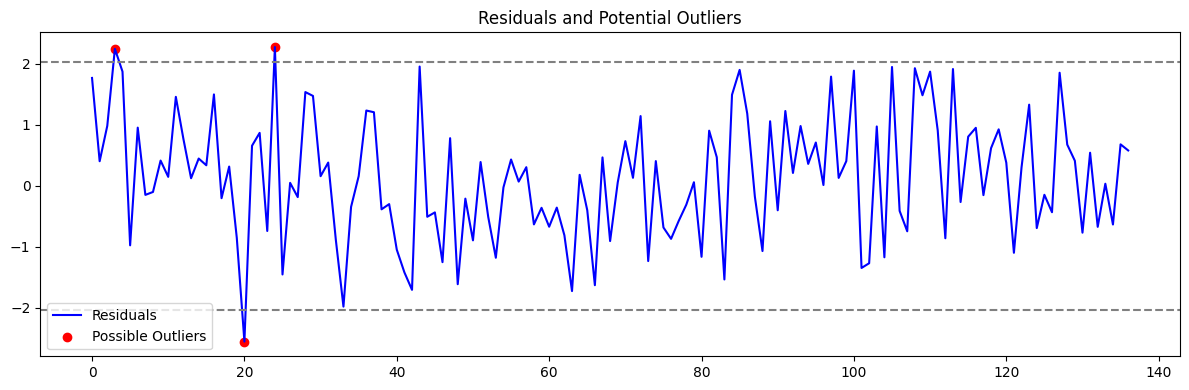

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# residuals = fitted_model.resid.dropna()
threshold = 2 * np.std(residuals)  # 经验值：2σ或1.96σ
outliers = np.abs(residuals) > threshold

plt.figure(figsize=(12, 4))
plt.plot(residuals, label="Residuals", color='blue')
plt.scatter(np.where(outliers)[0], residuals[outliers], color='red', label='Possible Outliers')
plt.axhline(threshold, color='gray', linestyle='--')
plt.axhline(-threshold, color='gray', linestyle='--')
plt.title("Residuals and Potential Outliers")
plt.legend()
plt.tight_layout()
plt.show()


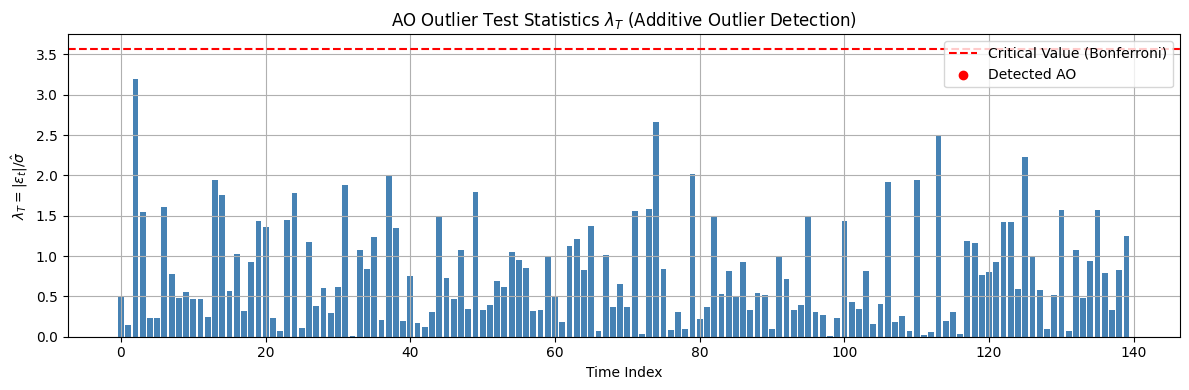

Empty DataFrame
Columns: [Index, Lambda, Residual]
Index: []


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch.unitroot import PhillipsPerron
from statsmodels.stats.diagnostic import acorr_ljungbox

# 假设我们已有残差序列 residuals，模拟构造一些数据（可替换为真实值）
np.random.seed(42)
n = 140
residuals = np.random.normal(0, 1, size=n)
residuals[2] += 2.5  # 加入人为异常
residuals[20] -= 2.8
residuals[24] += 2.3

# ---------- Step 1: 构造 lambda_T（AO统计量） ----------
sigma = np.std(residuals)
lambda_t = np.abs(residuals) / sigma

# ---------- Step 2: 设置临界值（Bonferroni校正） ----------
from scipy.stats import norm
alpha = 0.05
critical_value = norm.ppf(1 - alpha / (2 * n))  # 双侧检验，Bonferroni修正
outlier_idx = np.where(lambda_t > critical_value)[0]

# ---------- Step 3: 可视化 ----------
plt.figure(figsize=(12, 4))
plt.bar(np.arange(n), lambda_t, color="steelblue")
plt.axhline(y=critical_value, color="red", linestyle="--", label="Critical Value (Bonferroni)")
plt.scatter(outlier_idx, lambda_t[outlier_idx], color="red", label="Detected AO")
plt.title("AO Outlier Test Statistics $\\lambda_{T}$ (Additive Outlier Detection)")
plt.xlabel("Time Index")
plt.ylabel("$\\lambda_T = |\\varepsilon_t| / \\hat{\\sigma}$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 返回 outlier 的具体时间点索引与 lambda 值
outlier_points = pd.DataFrame({
    "Index": outlier_idx,
    "Lambda": lambda_t[outlier_idx],
    "Residual": residuals[outlier_idx]
})
print(outlier_points)



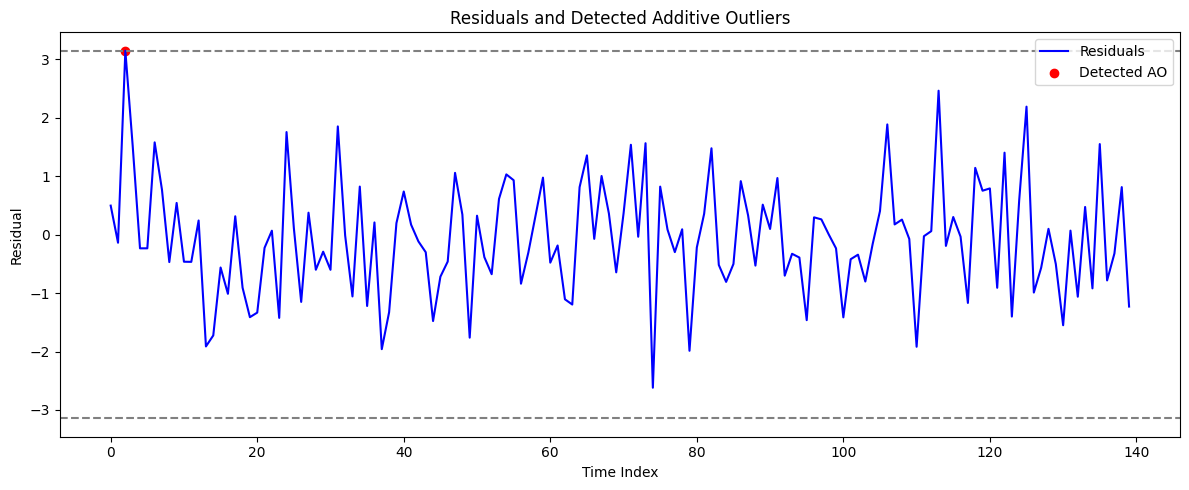

In [20]:
# 假设你已经有 residuals 和 lambda_t（λ_T）序列
import numpy as np
import pandas as pd

# 假设你的 residual 是 numpy 或 pandas 格式，长度为 n
n = len(residuals)
alpha = 0.05
critical_value = np.sqrt(2 * np.log(n))  # Bonferroni 阈值

# 检测 AO
ao_indices = np.where(lambda_t > critical_value)[0]
ao_indices  # 输出被检测到的异常点的索引
plt.figure(figsize=(12, 5))
plt.plot(residuals, label="Residuals", color='blue')
plt.axhline(critical_value, color='gray', linestyle='--')
plt.axhline(-critical_value, color='gray', linestyle='--')
plt.scatter(ao_indices, residuals[ao_indices], color='red', label="Detected AO")
plt.title("Residuals and Detected Additive Outliers")
plt.xlabel("Time Index")
plt.ylabel("Residual")
plt.legend()
plt.tight_layout()
plt.show()


Bonferroni Critical Value: 3.57


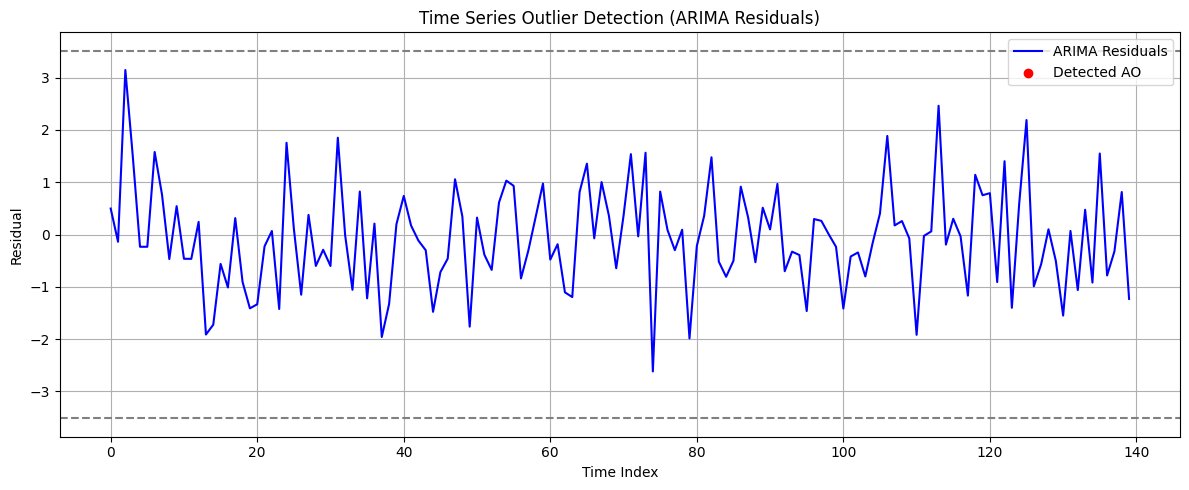

Detected AO Indices: []
Detected AO Dates:
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# === Step 1: 获取 residuals（你已经定义了 residuals = arima_model.resid） ===
# 如果忘了，可以重新赋值
# residuals = arima_model.resid.dropna()

# === Step 2: 计算 lambda_T = |ε_t| / σ_hat ===
sigma_hat = np.std(residuals)
lambda_t = np.abs(residuals) / sigma_hat

# === Step 3: 设置 Bonferroni 临界值 ===
n = len(residuals)
alpha = 0.05
critical_value = norm.ppf(1 - alpha / (2 * n))  # 双尾 Bonferroni
print(f"Bonferroni Critical Value: {critical_value:.2f}")

# === Step 4: 检测超出阈值的 AO 点 ===
ao_indices = np.where(lambda_t > critical_value)[0]

# === Step 5: 可视化 ===
plt.figure(figsize=(12, 5))
plt.plot(residuals, label="ARIMA Residuals", color='blue')
plt.scatter(ao_indices, residuals[ao_indices], color='red', label="Detected AO")

plt.axhline(critical_value * sigma_hat, color='gray', linestyle='--')
plt.axhline(-critical_value * sigma_hat, color='gray', linestyle='--')
plt.title("Time Series Outlier Detection (ARIMA Residuals)")
plt.xlabel("Time Index")
plt.ylabel("Residual")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# === Step 6: 打印检测结果 ===
print("Detected AO Indices:", ao_indices)
print("Detected AO Dates:")
print(monthly_df.index[ao_indices])


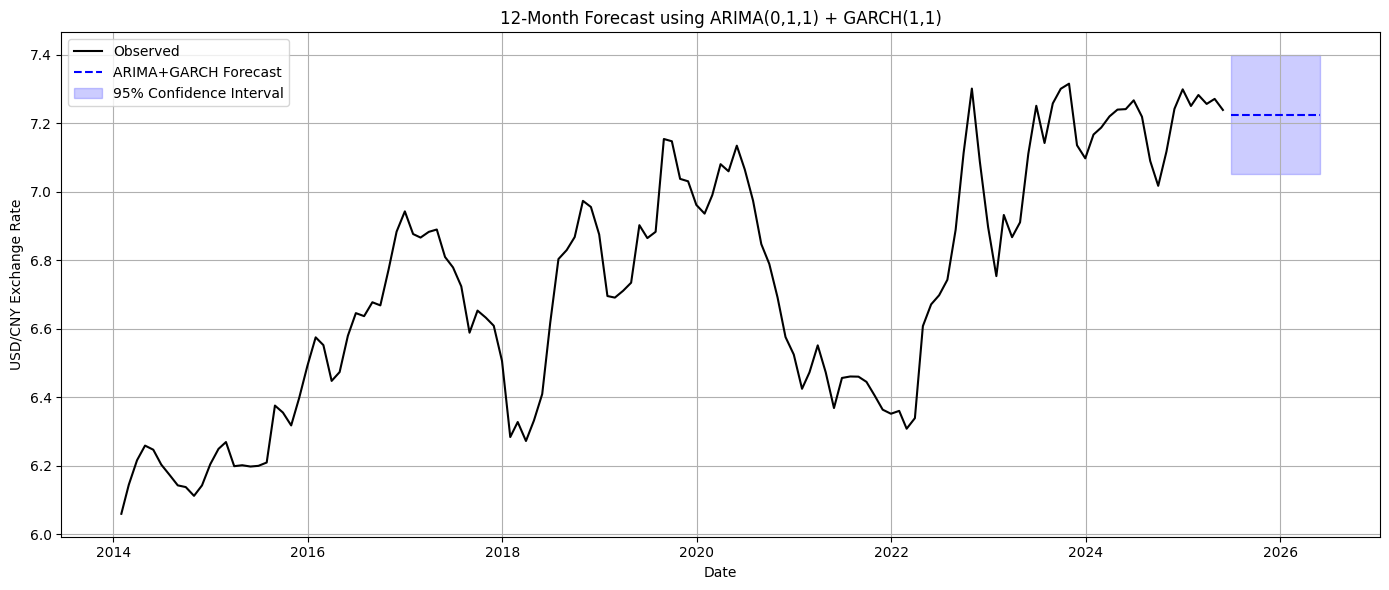

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 重新拟合 ARIMA(0,1,1) 模型以获取真实残差
arima_model = SARIMAX(monthly_df, order=(0, 1, 1), seasonal_order=(0, 0, 0, 0)).fit(disp=False)
arima_resid = arima_model.resid.dropna()

# 拟合 GARCH(1,1) 模型
garch_model = arch_model(arima_resid, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp="off")

# 预测未来 12 期条件方差
garch_forecast = garch_fit.forecast(horizon=12)
sigma_forecast = np.sqrt(garch_forecast.variance.values[-1, :])  # 获取预测的标准差

# 获取ARIMA未来12期的点预测
arima_forecast = arima_model.get_forecast(steps=12)
mean_forecast = arima_forecast.predicted_mean

# 构建置信区间（ARIMA均值 + GARCH波动）
conf_int_upper = mean_forecast + 1.96 * sigma_forecast
conf_int_lower = mean_forecast - 1.96 * sigma_forecast

# 构造时间索引
last_date = monthly_df.index[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthEnd(1), periods=12, freq='M')

# 可视化预测结果
plt.figure(figsize=(14, 6))
plt.plot(monthly_df, color='black', label='Observed')
plt.plot(future_dates, mean_forecast, label='ARIMA+GARCH Forecast', linestyle='--', color='blue')
plt.fill_between(future_dates, conf_int_lower, conf_int_upper, color='blue', alpha=0.2, label='95% Confidence Interval')
plt.title('12-Month Forecast using ARIMA(0,1,1) + GARCH(1,1)')
plt.xlabel('Date')
plt.ylabel('USD/CNY Exchange Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


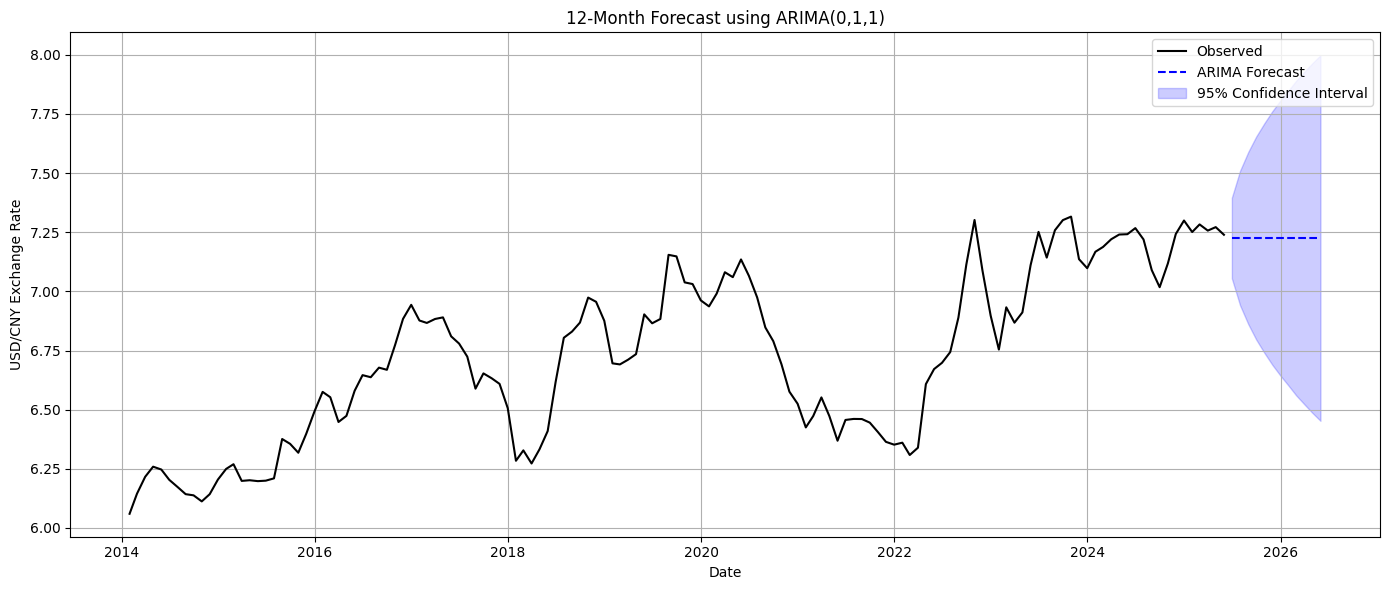

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 预测未来 12 个月
forecast_steps = 12
forecast_result = arima_model.get_forecast(steps=forecast_steps)
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# 构造预测时间索引
last_date = monthly_df.index[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthEnd(1), periods=forecast_steps, freq='M')

# 可视化预测结果
plt.figure(figsize=(14, 6))
plt.plot(monthly_df.index, monthly_df, label='Observed', color='black')
plt.plot(future_dates, forecast_mean, label='ARIMA Forecast', color='blue', linestyle='--')
plt.fill_between(future_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='blue', alpha=0.2, label='95% Confidence Interval')
plt.title("12-Month Forecast using ARIMA(0,1,1)")
plt.xlabel("Date")
plt.ylabel("USD/CNY Exchange Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


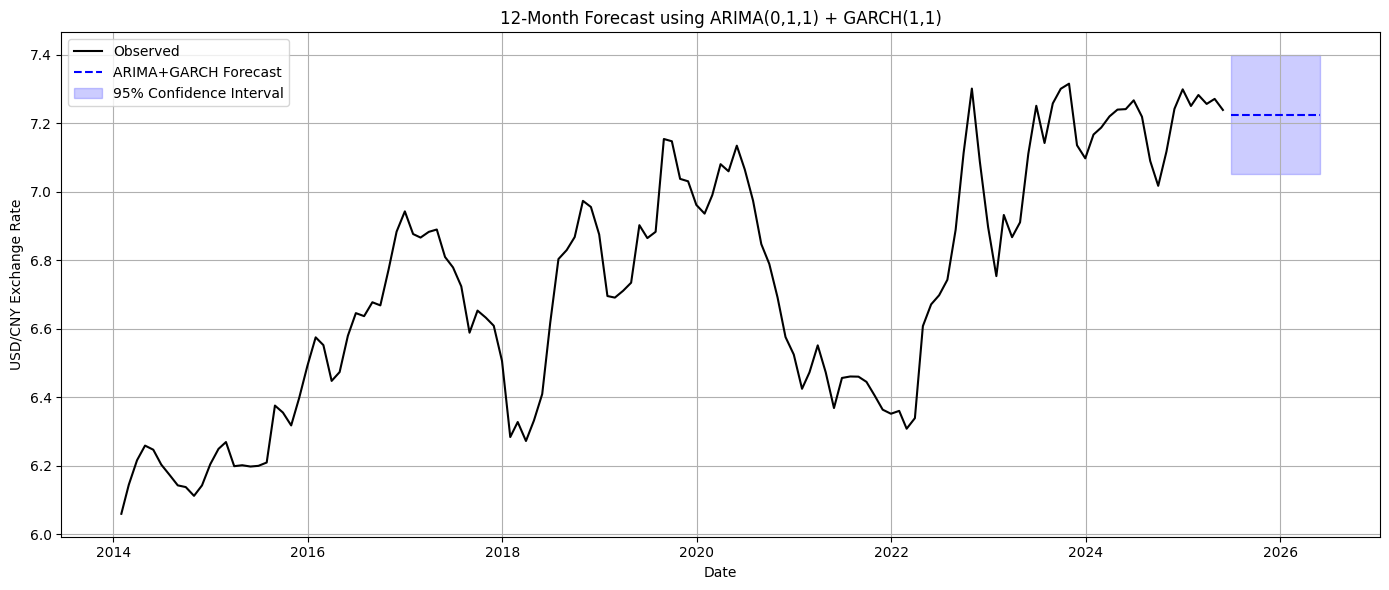

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. 拟合 ARIMA(0,1,1)
arima_model = SARIMAX(monthly_df, order=(0,1,1), seasonal_order=(0,0,0,0)).fit(disp=False)

# 2. 获取拟合残差并拟合 GARCH(1,1)
arima_resid = arima_model.resid.dropna()
garch_model = arch_model(arima_resid, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')

# 3. 获取未来 12 期预测值（由 ARIMA 模型生成）
forecast_steps = 12
arima_forecast = arima_model.get_forecast(steps=forecast_steps)
forecast_mean = arima_forecast.predicted_mean

# 4. 获取未来 12 期的条件标准差（由 GARCH 模型提供）
garch_forecast = garch_fit.forecast(horizon=forecast_steps)
sigma_forecast = np.sqrt(garch_forecast.variance.values[-1, :])  # shape: (1, 12)

# 5. 构建置信区间
conf_int_upper = forecast_mean + 1.96 * sigma_forecast
conf_int_lower = forecast_mean - 1.96 * sigma_forecast

# 6. 构造时间索引
last_date = monthly_df.index[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthEnd(1), periods=forecast_steps, freq='M')

# 7. 可视化
plt.figure(figsize=(14, 6))
plt.plot(monthly_df, label='Observed', color='black')
plt.plot(future_dates, forecast_mean, label='ARIMA+GARCH Forecast', color='blue', linestyle='--')
plt.fill_between(future_dates, conf_int_lower, conf_int_upper, color='blue', alpha=0.2, label='95% Confidence Interval')
plt.title('12-Month Forecast using ARIMA(0,1,1) + GARCH(1,1)')
plt.xlabel('Date')
plt.ylabel('USD/CNY Exchange Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
